General include statements

In [119]:
# import from basic Python to be able to read automatically the name of a file
import sys
import os

# import to use numpy arrays
import numpy as np
import pandas as pd

#
from collections import Counter

Configuration options

In [120]:
debug=False
verbose=True
doTest=False

doPrepareDataInputOutput=False
doTrainNN=False
doAnalyzeNN=True
doPlot=True

# output stem
inputFolderName="/eos/user/m/msmk/data/mltracking/sim/ttbar_mu200-generic"
eventNumber="000000099"
outputFolderName="./output"

bucketSize=20

Functions to read the data

In [121]:
# a general function to print the values and other properties of a numpy array
# use to see the values of the numpy arrays in our code for debugging and understanding the code flow
def print_nparray(name,nparray,doForce=False):
    if debug or doForce:
        print("")
        print("nparray",name)
        print(nparray)
        print("type",type(nparray),"shape",nparray.shape,"min_value=%.3f"%np.min(nparray),"min_position=%.0f"%np.argmin(nparray),"max_value=%.3f"%np.max(nparray),"max_position=%.0f"%np.argmax(nparray))
# done function

def print_df(name,df,doForce=False):
    if debug or doForce:
        print(name,"shape",df.shape)
        # print(df.head())
        # print(df.tail())
        print(df)
# done function

# df means panda data frame
def get_df_from_file(name,inputFileName):
    if debug:
        print("name",name,"inputFileName",inputFileName)
    df=pd.read_csv(inputFileName)
    print_df(name,df)
    return df
# done function

def get_df_hits_for_one_event(eventNumber):
    df_hits_recon=get_df_from_file("df_hits_recon",inputFolderName+"/event"+eventNumber+"-hits.csv")
    df_hits_truth=get_df_from_file("df_hits_truth",inputFolderName+"/event"+eventNumber+"-truth.csv")
    df_particles=get_df_from_file("df_particles",inputFolderName+"/event"+eventNumber+"-particles.csv")
    # combine df_hits_recon and df_hits_truth into a common df_hits
    df_hits=pd.concat([df_hits_recon,df_hits_truth],axis=1,sort=False)    
    print_df("df_hits",df_hits)
    return df_hits
# done function

In [122]:
df_hits=get_df_hits_for_one_event(eventNumber)
# print_df("df_hits",df_hits,True)
df_hits

,hit_id,x,y,z,volume_id,layer_id,module_id,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz
0,0,53.6895,8.814610,-1502.5,7,2,1,0,18014467228958720,53.6668,8.821300,-1502.5,0.973584,0.159988,-28.120100
1,1,70.7608,7.700570,-1502.5,7,2,1,1,22528787094700032,70.7375,7.716360,-1502.5,0.213369,0.023315,-4.386220
2,2,80.2306,11.405000,-1502.5,7,2,1,2,63052593806442496,80.2098,11.402000,-1502.5,0.050232,0.007147,-0.985516
3,3,63.7141,4.036390,-1502.5,7,2,1,3,103588701304520704,63.7169,4.024370,-1502.5,0.196107,0.012337,-4.797500
4,4,63.8302,3.995370,-1502.5,7,2,1,4,117101080734597120,63.8096,4.002310,-1502.5,0.049758,0.003124,-1.159650
5,5,36.3365,4.188840,-1502.5,7,2,1,5,144119998439227392,36.3572,4.189920,-1502.5,0.694746,0.080082,-29.166000
6,6,96.2093,13.916400,-1502.5,7,2,1,6,171138366388043776,96.2000,13.922400,-1502.5,0.050748,0.007344,-0.724195
7,7,64.9762,-0.528659,-1502.5,7,2,1,7,193658151231291392,64.9890,-0.507529,-1502.5,0.278147,-0.002304,-6.462090
8,8,78.1766,10.842100,-1502.5,7,2,1,8,193663717508907008,78.1625,10.828700,-1502.5,0.616585,0.085178,-11.910600
9,9,32.7480,1.749780,-1502.5,7,2,1,9,193666603726929920,32.7255,1.737070,-1502.5,0.140097,0.007304,-6.463650


In [123]:
nparray_layer_id=df_hits["layer_id"]
# print(nparray_layer_id)
dict_id_counter={}
for e in nparray_layer_id:
    if e in dict_id_counter:
        dict_id_counter[e]+=1
    else:
        dict_id_counter[e]=1
for e in sorted(dict_id_counter.keys()):
    print(e,dict_id_counter[e]) 
    
    

2 29124
4 24923
6 20030
8 18354
10 9433
12 9438
14 5591


from this we learned that the first layer has id 2 and there are around 29k hits and for each of these we will use annoy to find the 20 nearest neighbors in direction, which we will use to train an test the neural network


Annoy 

In [124]:
from annoy import AnnoyIndex
import random
import matplotlib.pyplot as plt

In [125]:
def buildAnnoyIndex(data,metric="angular",ntrees=10):
    f=len(data[0])
    print("f",f)
    t=AnnoyIndex(f,metric)
    print("type(t)",type(t))
    print("enumerate data")
    for i,d in enumerate(data):
        if debug:
            print("i",i,"d",d)
        t.add_item(i,d)
    # done for loop
    t.build(ntrees) # 10 trees
    return t
# done function

def study_annoy(df_hits,debug):
    nparray_position=df_hits[["x","y","z"]].values
    #print_nparray("nparray_position",nparray_position)
    #return
    index=buildAnnoyIndex(nparray_position,metric="angular",ntrees=10)
    if debug or verbose:
        print("type(index)",index)
        print("len(df_hits)",len(df_hits))
    n=random.choice(range(len(df_hits)))
    if debug or verbose:
        print("n",n)
    list_index=index.get_nns_by_item(n,bucketSize)
    if debug or verbose:
        print("list_index",list_index)
    nparray_index=np.array(list_index)
    df_bucket=df_hits.iloc[nparray_index]
    plt.plot(df_bucket.x,df_bucket.y,"o")
    plt.plot(0,0,"r+")
    plt.show()
    plt.savefig(outputFolderName+"/test.pdf")
    return df_bucket
# done function


f 3
type(t) <class 'annoy.Annoy'>
enumerate data
type(index) <annoy.Annoy object at 0x7fbb15bb2f30>
len(df_hits) 116893
n 44938
list_index [44938, 44933, 32389, 44936, 25284, 33286, 79292, 23377, 39202, 39198, 25344, 44934, 25345, 23456, 85175, 44937, 79286, 79650, 79646, 25315]


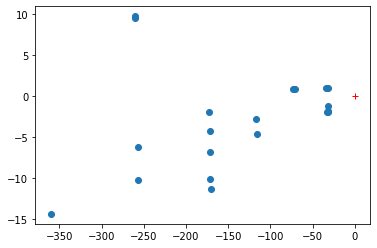

,hit_id,x,y,z,volume_id,layer_id,module_id,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz
44938,44938,-172.5080,-1.992290,-225.7490,8,8,235,44938,873699908257841152,-172.5090,-1.986220,-225.7480,-0.661996,-0.007576,-0.437701
44933,44933,-172.0990,-4.237210,-222.0100,8,8,235,44933,40533633596915712,-172.1010,-4.226780,-222.0100,-1.873490,-0.045941,-2.047530
32389,32389,-73.3085,0.809727,-95.6567,8,4,161,32389,909731247897444352,-73.3103,0.817098,-95.6561,-0.313392,0.003473,0.127014
44936,44936,-171.6200,-6.865320,-223.9390,8,8,235,44936,666532813570416640,-171.6210,-6.860490,-223.9380,-0.483363,-0.019271,-0.570252
25284,25284,-32.0551,-1.239450,-41.0837,8,2,112,25284,238698270673600512,-32.0541,-1.221700,-41.0832,-1.460110,-0.056313,2.550910
33286,33286,-71.1435,0.795103,-96.5342,8,4,192,33286,909731247897444352,-71.1434,0.793083,-96.5343,-0.313392,0.003473,0.127014
79292,79292,-256.9840,-10.237200,-324.7970,13,2,281,79292,666532813570416640,-256.9860,-10.263800,-324.6490,-0.483363,-0.019271,-0.570252
23377,23377,-34.1729,0.980364,-44.5691,8,2,97,23377,157626811591688192,-34.1761,0.989643,-44.5727,-1.013960,0.029958,0.550619
39202,39202,-116.5150,-4.670250,-158.9270,8,6,209,39202,666532813570416640,-116.5160,-4.663600,-158.9280,-0.483363,-0.019271,-0.570252
39198,39198,-116.8780,-2.882700,-161.6590,8,6,209,39198,40533633596915712,-116.8800,-2.872690,-161.6590,-1.873490,-0.045941,-2.047530


<Figure size 432x288 with 0 Axes>

In [126]:
df_bucket=study_annoy(df_hits,debug)
df_bucket
 

In [127]:
def get_nparray_inputValue(df_bucket,debug):
    nparray_position=df_bucket[["x","y","z"]].values
    print_nparray("nparray_position",nparray_position)
    nparray_value=nparray_position.flatten()
    return nparray_value
# done function

In [128]:
nparray_inputValue=get_nparray_inputValue(df_bucket,debug)
print_nparray("nparray_inputValue",nparray_inputValue,True)


nparray nparray_inputValue
[-172.508      -1.99229  -225.749    -172.099      -4.23721  -222.01
  -73.3085      0.809727  -95.6567   -171.62       -6.86532  -223.939
  -32.0551     -1.23945   -41.0837    -71.1435      0.795103  -96.5342
 -256.984     -10.2372   -324.797     -34.1729      0.980364  -44.5691
 -116.515      -4.67025  -158.927    -116.878      -2.8827   -161.659
  -32.0889     -1.8385    -42.1194   -171.033     -10.085    -225.036
  -32.0946     -1.93834   -42.5094    -33.138      -1.97962   -42.5094
 -360.377     -14.3854   -446.2      -170.804     -11.342    -224.226
 -256.7        -6.27379  -314.4      -260.207       9.51914  -330.
 -260.166       9.69449  -328.8       -31.9284      1.00698   -44.0834  ]
type <class 'numpy.ndarray'> shape (60,) min_value=-446.200 min_position=44 max_value=9.694 max_position=55


Output

In [129]:
def get_particle_id_most_common(df_bucket,debug):
    counter=Counter(df_bucket.particle_id.values)
    list_tuple_most_common=counter.most_common()
    tuple_most_common=list_tuple_most_common[0]
    particle_id_most_common=tuple_most_common[0]
    if debug:
        print("particle_id_most_common",particle_id_most_common)
    return particle_id_most_common
# done function

def get_nparray_outputValue(df_bucket,debug):
    list_outputValue=[]
    particle_id_most_common=get_particle_id_most_common(df_bucket,debug)
    for i in range (df_bucket.shape[0]):
        hit=df_bucket.iloc[i]
        particle_id=hit["particle_id"]
        if particle_id==particle_id_most_common:
            output=1.0
        else:
            output=-1.0
        if debug and False:
            print("i", i,"particle_id",particle_id,"particle_id_most_common",particle_id_most_common,"output",output)
        list_outputValue.append(output)
    # done for loop
    nparray_outputValue=np.array(list_outputValue)
    print_nparray("nparray_outputValue",nparray_outputValue)
    return nparray_outputValue
# done function


In [ ]:
2+1

Write input and output to NN 

In [130]:
nparray_outputValue=get_nparray_outputValue(df_bucket,debug)
print_nparray("nparray_outputValue",nparray_outputValue,True)


nparray nparray_outputValue
[-1. -1. -1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1.
 -1. -1.]
type <class 'numpy.ndarray'> shape (20,) min_value=-1.000 min_position=0 max_value=1.000 max_position=3


In [131]:
print("Start doing input output for this event")

Start doing input output for this event


In [132]:
# valueInputOutput=io
list_io="Input,Output".split(",")
dict_io_fileName={}
for io in list_io:
    dict_io_fileName[io]=outputFolderName+"/NN_1_data_"+io+"_"+eventNumber+".npy"

def write_to_file_NN_data_dict_io_nparray(df_hits):
    nrHits=df_hits.shape[0]
    if debug:
        print("nrHits",nrHits)
    nparray_position=df_hits[["x","y","z"]].values
    print_nparray("nparray_position",nparray_position)
    index=buildAnnoyIndex(nparray_position,metric="angular",ntrees=10)
    if True:
        print("annoy index built")
    if debug or verbose:
        print("type(index)",index)
        print("len(df_hits)",len(df_hits))
    #    
    dict_io_list_nparray_value={}
    counterBucket=0
    nparray_layer_id=df_hits["layer_id"]
    for i in range(nrHits):
        if doTest==True:
            if counterBucket>40:
                continue
        if debug:
            print("i",i,"layer_id",nparray_layer_id[i])
        isFirstLayer=nparray_layer_id[i]==2
        if isFirstLayer==False:
            continue
        counterBucket+=1
        if debug or (verbose and counterBucket%100==0):
            print(i,counterBucket)
        # remaining i our hits from first layer
        if debug:
            print("print list_index for hit",i)
        list_index=index.get_nns_by_item(i,bucketSize)
        if debug:
            print("list_index",list_index)
        nparray_index=np.array(list_index)
        if debug:
            print("create df_bucket for",i)
        df_bucket=df_hits.iloc[nparray_index]
        if debug:
            print("end create df_bucket for",i)
        #
        dict_io_nparray_value={}
        dict_io_nparray_value["Input"]=get_nparray_inputValue(df_bucket,debug)
        dict_io_nparray_value["Output"]=get_nparray_outputValue(df_bucket,debug)
        for io in list_io:
            if debug:
                print_nparray("nparray_value "+io,dict_io_nparray_value[io]) 
            if io not in dict_io_list_nparray_value:
                dict_io_list_nparray_value[io]=[]
            else:
                dict_io_list_nparray_value[io].append(dict_io_nparray_value[io])
            # done if
        # done for loop over io
    # done for loop over hits
    if debug or verbose:
        print("counterBucket",counterBucket)
    # done if
    dict_io_nparray={}
    for io in list_io:
        print("length_"+io,len(dict_io_list_nparray_value[io]))
        # convert list_value to nparray
        dict_io_nparray[io]=np.array(dict_io_list_nparray_value[io])
        # print 
        print_nparray(io,dict_io_nparray[io])
        # write nparray to file
        np.save(dict_io_fileName[io],dict_io_nparray[io])
    # done for loop over io
# done function

In [133]:
if doPrepareDataInputOutput:
    write_to_file_NN_data_dict_io_nparray(df_hits)
    print(">>>> all done writing input and output in nparray for this event")

Split input and output in train and test

In [134]:
# valueTrainTest=tt
list_tt="Train,Test".split(",")

dict_io_tt_fileName={}
for io in list_io:
    for tt in list_tt:
        dict_io_tt_fileName[io+tt]=outputFolderName+"/NN_2_data_"+io+tt+"_"+eventNumber+".npy"
        
def write_to_file_NN_data_dict_io_tt_nparray():
    dict_io_tt_nparray={}
    for io in list_io:
        nparray=np.load(dict_io_fileName[io])
        print_nparray(io,nparray)
        nrRow=nparray.shape[0]
        # keep only an even number, to split train and test in equal number
        if nrRow%2==1:
            nrRow-=1
        dict_tt_list_index={}
        dict_tt_list_index["Train"]=[i for i in range(nrRow) if i%2==0] # even indices
        dict_tt_list_index["Test"] =[i for i in range(nrRow) if i%2==1] # odd  indices
        for tt in list_tt:
            dict_io_tt_nparray[io+tt]=nparray[dict_tt_list_index[tt],:]
            if io=="Input":
                # reshape to have an extra dimension of size one, needed by Keras
                dict_io_tt_nparray[io+tt]=dict_io_tt_nparray[io+tt].reshape(dict_io_tt_nparray[io+tt].shape[0],dict_io_tt_nparray[io+tt].shape[1],1)
            # print
            print_nparray(io+tt,dict_io_tt_nparray[io+tt])
            # write nparray to file
            np.save(dict_io_tt_fileName[io+tt],dict_io_tt_nparray[io+tt])
        # done for loop over tt
    # done for loop over io
# done function

def read_from_file_NN_data_dict_io_tt_nparray():
    dict_io_tt_nparray={}
    for io in list_io:
        for tt in list_tt:
            dict_io_tt_nparray[io+tt]=np.load(dict_io_tt_fileName[io+tt])
            print_nparray(io+tt,dict_io_tt_nparray[io+tt])
        # done for loop over tt
    # done for loop over io
    return dict_io_tt_nparray
# done function

In [135]:
if doPrepareDataInputOutput:
    write_to_file_NN_data_dict_io_tt_nparray()

NN

Create NN empty model, train, test, accuracy, loss 

In [136]:
# to obtain reproducible results, meaning each new NN training to obtain the same result, set the seed of the random number now
# np.random.seed(2019)
# np.random.seed(20190825)
np.random.seed(98383822)

nrNodesInputLayer=bucketSize*3 # three inputs (x, y, z) for each hit in the batch
nrNodesOutputLayer=bucketSize*1 # one output for each hit in the batch

import keras
# for DNN training with Keras
# the order is layer and k (from architecture), nrEpoch, batchSize (from learning steps)

numberOfEpochs=300

if True:
    list_infoNN=[
        ["A1",1,numberOfEpochs,1000],
        ["B1",1,numberOfEpochs,1000],
        ["C1",1,numberOfEpochs,1000],
        ["D1",1,numberOfEpochs,1000],
        ["E1",1,numberOfEpochs,1000],
        ["F1",1,numberOfEpochs,1000],
        ["G1",1,numberOfEpochs,1000],
        #
        ["A1",2,numberOfEpochs,1000],
        ["B1",2,numberOfEpochs,1000],
        ["C1",2,numberOfEpochs,1000],
        ["D1",2,numberOfEpochs,1000],
        ["E1",2,numberOfEpochs,1000],
        ["F1",2,numberOfEpochs,1000],
        ["G1",2,numberOfEpochs,1000],
        #
        ["A1",3,numberOfEpochs,1000],
        ["B1",3,numberOfEpochs,1000],
        ["C1",3,numberOfEpochs,1000],
        ["D1",3,numberOfEpochs,1000],
        ["E1",3,numberOfEpochs,1000],
        ["F1",3,numberOfEpochs,1000],
        ["G1",3,numberOfEpochs,1000],      
        # 
        ["A1",4,numberOfEpochs,1000],
        ["B1",4,numberOfEpochs,1000],
        ["C1",4,numberOfEpochs,1000],
        ["D1",4,numberOfEpochs,1000],
        ["E1",4,numberOfEpochs,1000],
        ["F1",4,numberOfEpochs,1000],
        ["G1",4,numberOfEpochs,1000],
        #
        ["A2",1,numberOfEpochs,1000],
        ["B2",1,numberOfEpochs,1000],
        ["C2",1,numberOfEpochs,1000],
        ["D2",1,numberOfEpochs,1000],
        ["E2",1,numberOfEpochs,1000],
        ["F2",1,numberOfEpochs,1000],
        ["G2",1,numberOfEpochs,1000],
        #
        ["A2",2,numberOfEpochs,1000],
        ["B2",2,numberOfEpochs,1000],
        ["C2",2,numberOfEpochs,1000],
        ["D2",2,numberOfEpochs,1000],
        ["E2",2,numberOfEpochs,1000],
        ["F2",2,numberOfEpochs,1000],
        ["G2",2,numberOfEpochs,1000],
        #
        ["A2",3,numberOfEpochs,1000],
        ["B2",3,numberOfEpochs,1000],
        ["C2",3,numberOfEpochs,1000],
        ["D2",3,numberOfEpochs,1000],
        ["E2",3,numberOfEpochs,1000],
        ["F2",3,numberOfEpochs,1000],
        ["G2",3,numberOfEpochs,1000],      
        # 
        ["A2",4,numberOfEpochs,1000],
        ["B2",4,numberOfEpochs,1000],
        ["C2",4,numberOfEpochs,1000],
        ["D2",4,numberOfEpochs,1000],
        ["E2",4,numberOfEpochs,1000],
        ["F2",4,numberOfEpochs,1000],
        ["G2",4,numberOfEpochs,1000],
        #
        ["A4",1,numberOfEpochs,1000],
        ["B4",1,numberOfEpochs,1000],
        ["C4",1,numberOfEpochs,1000],
        ["D4",1,numberOfEpochs,1000],
        ["E4",1,numberOfEpochs,1000],
        ["F4",1,numberOfEpochs,1000],
        ["G4",1,numberOfEpochs,1000],
        #
        ["A4",2,numberOfEpochs,1000],
        ["B4",2,numberOfEpochs,1000],
        ["C4",2,numberOfEpochs,1000],
        ["D4",2,numberOfEpochs,1000],
        ["E4",2,numberOfEpochs,1000],
        ["F4",2,numberOfEpochs,1000],
        ["G4",2,numberOfEpochs,1000],
        #
        ["A4",3,numberOfEpochs,1000],
        ["B4",3,numberOfEpochs,1000],
        ["C4",3,numberOfEpochs,1000],
        ["D4",3,numberOfEpochs,1000],
        ["E4",3,numberOfEpochs,1000],
        ["F4",3,numberOfEpochs,1000],
        ["G4",3,numberOfEpochs,1000],      
        # 
        ["A4",4,numberOfEpochs,1000],
        ["B4",4,numberOfEpochs,1000],
        ["C4",4,numberOfEpochs,1000],
        ["D4",4,numberOfEpochs,1000],
        ["E4",4,numberOfEpochs,1000],
        ["F4",4,numberOfEpochs,1000],
        ["G4",4,numberOfEpochs,1000],
    ]


if False:
    list_infoNN=[
        ["A2",4,30,1000],
        ["B2",4,30,1000],
     ]

In [149]:
def get_from_infoNN(infoNN):
    layer=infoNN[0]
    k=infoNN[1]
    nrEpoch=infoNN[2]
    batchSize=infoNN[3]
    if debug:
        print("get infoNN for","layer",layer,"k",str(k),"nrEpoch",str(nrEpoch),"batchSize",str(batchSize))
    nameNN="l_"+layer+"_k_"+str(k)+"_e_"+str(nrEpoch)+"_b_"+str(batchSize)
    if debug:
        print("nameNN",nameNN)
    # done if
    return nameNN,layer,k,nrEpoch,batchSize
# done function

# create an empty NN model, and documentation related to it
# https://keras.io/getting-started/sequential-model-guide/
# https://keras.io/layers/core/
# https://keras.io/activations/
# https://keras.io/losses/
def prepare_NN_model(layer="A3",k=4):
    if debug:
        print("")
        print("Prepare empty NN model (fixed geometry and weights filled with random numbers).")
    if debug:
        print("Start prepare model for layer",layer,"k",k)
    nrNodesHiddenLayer=bucketSize*k # let the user change this k as hyper-parameter
    # create empty model
    model=keras.models.Sequential()
    # define the geometry by defining how many layers and how many nodes per layer
    # add input layer
    # Flatten(): https://stackoverflow.com/questions/44176982/how-flatten-layer-works-in-keras?rq=1
    model.add(keras.layers.Dense(nrNodesInputLayer,activation='linear',input_shape=(nrNodesInputLayer,1)))
    # flatten input layer
    model.add(keras.layers.Flatten())
    # split layer in letter and digit
    layer_letter=layer[0] # letter means compilation option
    layer_digit=layer[1] # digit means number of hidden layers
    # add hidden layers
    if layer_digit=="1":
        model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    elif layer_digit=="2":
        model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
        model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
    elif layer_digit=="3":
        model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
        model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='relu'))
    elif layer_digit=="4":
        model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
        model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='relu'))
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='relu'))
    elif layer_digit=="5":
        model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
        model.add(keras.layers.Dense(nrNodesHiddenLayer,activation='relu'))
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='relu'))
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='relu'))
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='relu'))
    else:
        print("layer_digit",layer_digit,"not known. Choose 1,2,3,4,5. WILL ABORT!!!")
        assert(False)
    # done if
    # finished defining the geometry, and now define how the NN learns (is trained)
    if layer_letter=="A":
        # add output layer
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))
        model.compile(loss=keras.losses.hinge,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
    elif layer_letter=="B":
        # add output layer
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))
        model.compile(loss=keras.losses.squared_hinge,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
    elif layer_letter=="C":
        # add output layer
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))
        model.compile(loss=keras.losses.mean_squared_error,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
    elif layer_letter=="D":
        # add output layer
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))
        model.compile(loss=keras.losses.mean_absolute_error,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
    elif layer_letter=="E":
        # add output layer
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))
        model.compile(loss=keras.losses.mean_absolute_percentage_error,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
    elif layer_letter=="F":
        # add output layer
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))
        model.compile(loss=keras.losses.mean_squared_logarithmic_error,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
    elif layer_letter=="G":
        # add output layer
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='tanh'))
        model.compile(loss=keras.losses.poisson,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
    elif layer_letter=="H":
        # add output layer
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='softmax'))
        model.compile(loss=keras.losses.categorical_crossentropy,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
    elif layer_letter=="I":
        # add output layer
        model.add(keras.layers.Dense(nrNodesOutputLayer,activation='sigmoid'))
        model.compile(loss=keras.losses.binary_crossentropy,
                      optimizer=keras.optimizers.Adadelta(),
                      metrics=['accuracy'])
    else:
        print("layer_letter",layer_letter,"not known. Choose A, B, ..., G, H,I. WILL ABORT!!!")
        assert(False)
    # done if
    if debug:
        print("End   prepare model for layer",layer,"k",k)
    # done all, ready to return
    return model
# done function

# valueLossAccuracy=la
list_la="Loss,Accuracy".split(",")

dict_io_tt_fileName={}
for io in list_io:
    for tt in list_tt:
        dict_io_tt_fileName[io+tt]=outputFolderName+"/NN_2_data_"+io+tt+"_"+eventNumber+".npy"
        
def get_dict_la_tt_fileName(nameNN):
    dict_la_tt_fileName={}
    for la in list_la:
        for tt in list_tt:
            dict_la_tt_fileName[la+tt]=outputFolderName+"/NN_3_learn_"+la+tt+"_"+nameNN+".npy"
    dict_la_tt_fileName["nrEpoch"]=outputFolderName+"/NN_3_learn_"+"nrEpoch"+"_"+nameNN+".npy"
    # ready to return
    return dict_la_tt_fileName
# done function

def get_fileNameWeights(nameNN):
    fileNameWeights=outputFolderName+"/NN_3_learn_model_weights_"+nameNN+".hdf5"
    if debug:
        print("fileNameWeights",fileNameWeights)
    # done if
    return fileNameWeights
# done function
        
def train_NN_model(dict_io_tt_nparray,model,nameNN,nrEpoch,batchSize):
    if debug or verbose:
        print("Start train NN for",nameNN)
    # fit the model
    for io in list_io:
        for tt in list_tt:
            print_nparray(io+" "+tt,dict_io_tt_nparray[io+tt])
    # done forloop
    h=model.fit(
        dict_io_tt_nparray["Input"+"Train"],dict_io_tt_nparray["Output"+"Train"],
        batch_size=batchSize,epochs=nrEpoch,verbose=verbose,
        validation_data=(dict_io_tt_nparray["Input"+"Test"],dict_io_tt_nparray["Output"+"Test"]),
        shuffle=False
    )
    if debug:
        print("h.history")
        print(h.history)
        print("h.history.keys()")
        print(h.history.keys())
        print("print(h.history['val_loss'])")
        print(h.history['val_loss'],type(h.history['val_loss']))
    # losses and accuracy
    dict_la_tt_nparray={
         "Loss"+"Train":np.array(h.history['loss']),
         "Loss"+"Test":np.array(h.history['val_loss']),
         "Accuracy"+"Train":np.array(h.history['acc']),
         "Accuracy"+"Test":np.array(h.history['val_acc']),
         "nrEpoch":np.array(range(nrEpoch)),
     }
    #
    dict_la_tt_fileName=get_dict_la_tt_fileName(nameNN)
    # write to .npy files
    for key in dict_la_tt_nparray.keys():
        np.save(dict_la_tt_fileName[key],dict_la_tt_nparray[key])
    # done for loop
    # write learned weights of the model to .hdf5
    fileNameWeights=get_fileNameWeights(nameNN)
    model.save_weights(fileNameWeights)
    # finished all tasks, nothing to return
    if debug or verbose:
        print("End   train NN for",nameNN)
# done function

In [138]:
if doTrainNN:
    dict_io_tt_nparray=read_from_file_NN_data_dict_io_tt_nparray()
    # loop over different NN that we compare (arhitecture and learning)
    for infoNN in list_infoNN:
        nameNN,layer,k,nrEpoch,batchSize=get_from_infoNN(infoNN)
        # create empty train model architecture (layer and k), with bad initial random weights
        model=prepare_NN_model(layer,k)
        train_NN_model(dict_io_tt_nparray,model,nameNN=nameNN,nrEpoch=nrEpoch,batchSize=batchSize)

Plot overlay train and test for each NN

In [139]:
list_color=["r","b","m","k","g","o"]

def overlayGraphsValues(list_tupleArray,outputFileName="overlay",extensions="pdf,png",info_x=["Procent of data reduced",[0.0,1.0],"linear"],info_y=["Figure of merit of performance",[0.0,100000.0],"log"],info_legend=["best"],title="Loss and Accuracy",debug=False):
    if debug:
        print("Start overlayGraphsValues")
        print("outputFileName",outputFileName)
        print("extensions",extensions)
        print("info_x",info_x)
        print("info_y",info_y)
        print("info_legend",info_legend)
        print("title",title)
    # x axis
    x_label=info_x[0]
    x_lim=info_x[1]
    x_lim_min=x_lim[0]
    x_lim_max=x_lim[1]
    if x_lim_min==-1 and x_lim_max==-1:
        x_set_lim=False
    else:
        x_set_lim=True
    x_scale=info_x[2]
    if debug:
        print("x_label",x_label,type(x_label))
        print("x_lim_min",x_lim_min,type(x_lim_min))
        print("x_lim_max",x_lim_max,type(x_lim_max))
        print("x_set_lim",x_set_lim,type(x_set_lim))
        print("x_scale",x_scale,type(x_scale))
    # y axis
    y_label=info_y[0]
    y_lim=info_y[1]
    y_lim_min=y_lim[0]
    y_lim_max=y_lim[1]
    if y_lim_min==-1 and y_lim_max==-1:
        y_set_lim=False
    else:
        y_set_lim=True
    y_scale=info_y[2]
    if debug:
        print("y_label",y_label,type(y_label))
        print("y_lim_min",y_lim_min,type(y_lim_min))
        print("y_lim_max",y_lim_max,type(y_lim_max))
        print("y_set_lim",y_set_lim,type(y_set_lim))
        print ("y_scale",y_scale,type(y_scale))
    # create empty figure
    plt.figure(1)
    # set x-axis
    plt.xlabel(x_label)
    if x_set_lim==True:
        plt.xlim(x_lim_min,x_lim_max)
    plt.xscale(x_scale)
    # set y-axis
    plt.ylabel(y_label)
    if y_set_lim==True:
        plt.ylim(y_lim_min,y_lim_max)
    plt.yscale(y_scale)
    # set title
    plt.title(title)
    # fill content of plot
    for i,tupleArray in enumerate(list_tupleArray):
        if debug:
            print("i",i,"len",len(tupleArray))
        x=tupleArray[0]
        y=tupleArray[1]
        c=tupleArray[2]
        l=tupleArray[3]
        plt.plot(x,y,c,label=l)
    # done loop over each element to plot
    # set legend
    plt.legend(loc=info_legend[0])
    # for each extension create a plot
    for extension in extensions.split(","):
        fileNameFull=outputFileName+"."+extension
        print("Saving plot at",fileNameFull)
        plt.savefig(fileNameFull)
    # close the figure
    plt.close()  
# done function

def plot_Loss_Accuracy(nameNN):
    dict_la_tt_fileName=get_dict_la_tt_fileName(nameNN)
    for la in list_la:
        list_tupleArray=[]
        nparray_x=np.load(dict_la_tt_fileName["nrEpoch"])
        print_nparray("x-nrEpoch",nparray_x)
        for i,tt in enumerate(list_tt):
            nparray_y=np.load(dict_la_tt_fileName[la+tt])
            print_nparray("y-"+la+tt,nparray_y)
            color=list_color[i]
            legendName=la+" "+tt
            list_tupleArray.append((nparray_x,nparray_y,color,legendName))
        # done for loop
        outputFileName=outputFolderName+"/NN_plot1D_optionTrainTest_"+la+"_"+nameNN
        extensions="pdf" # "png,pdf"
        plotRange=[-1,-1]
        overlayGraphsValues(list_tupleArray,outputFileName=outputFileName,extensions=extensions,
                            info_x=["Number of epochs",[-1,-1],"linear"],
                            info_y=["Value of the "+la+" function",plotRange,"linear"],
                            info_legend=["best"],title="NN_"+la,debug=False) 
        # done for loop    
# done function

In [140]:
if doPlot:
    # loop over different NN that we compare (arhitecture and learning)
    for infoNN in list_infoNN:
        nameNN,layer,k,nrEpoch,batchSize=get_from_infoNN(infoNN)
        plot_Loss_Accuracy(nameNN)

Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_A1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_A1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_B1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_B1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_C1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_C1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_D1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_D1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_E1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_E1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_F1_k_1_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_F1_k_1_e_300_b_1000.pdf
Savi

Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_A2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_B2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_B2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_C2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_C2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_D2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_D2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_E2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_E2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_F2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Accuracy_l_F2_k_4_e_300_b_1000.pdf
Saving plot at ./output/NN_plot1D_optionTrainTest_Loss_l_G2_k_4_e_300_b_1000.pdf
Savi

Analyzing NN prediction relative to output

In [141]:
from matplotlib import pylab

# histtype: bar, barstacked, step, stepfilled
# nrBins: 100 or list of bins edges
# option A: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.hist.html
# only option A works if we want to add a text in the plot whose size is relative to the plot and not to the values plotted
# option B: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html
# to color different bins in different colors, like a rainbow gradient https://stackoverflow.com/questions/23061657/plot-histogram-with-colors-taken-from-colormap
# obtain the max value: # https://stackoverflow.com/questions/15558136/obtain-the-max-y-value-of-a-histogram
# plotting two histograms in one plt.hist did not work for me easily, but I loop over list of arrays anyway, as I need to give them different labels and colors etc
def overlay_histogram_from_nparray_with_ratio(list_tupleArray,outputFileName="./output_histo_from_nparray",extensions="png,pdf",nrBins=100,histtype="step",info_x=["x-axis"],info_y=["Number of points"],title="Title",text=None,info_legend=["best"],list_color="r,g,b,k,y".split(","),doAddRatioPad=False,debug=False,verbose=False):
    if debug:
        print("Start draw_histogram_from_nparray()")
        print("outputFileName",outputFileName)
        print("extensions",extensions)
        print("info_x",info_x)
        print("info_y",info_y)
        print("title",title)
    # 
    max_y=np.NINF # negative infinity
    fig=pylab.figure()
    n_reference=0
    for i,(nparray,legendText) in enumerate(list_tupleArray):
        if debug:
            print("i",i,legendText,nparray)
        if doAddRatioPad:
            ax=fig.add_subplot(211)
        else:
            ax=fig.add_subplot(111)
        n,b,patches=ax.hist(nparray,bins=nrBins,alpha=1.0,color=list_color[i],histtype=histtype,label=legendText)
        if n.max()>max_y:
            max_y=n.max()
        if debug:
            print_nparray("n",n)
            print_nparray("b",b)
            print("patches",patches)
            print("max_y",max_y)
        if doAddRatioPad:
            if i==0:
                n_reference=copy.deepcopy(n)
            # calculate ratio of number of bins
            n_ratio=n/n_reference
            if debug:
                print_nparray("n_reference",n_reference)
                print_nparray("n_ratio",n_ratio)
            # add the ratio as numpy arrays
            ax2=fig.add_subplot(212)
            ax2.plot(b[1:],n_ratio,c=list_color[i],label=legendText)
        # done if doAddRatioPad
    # done loop over histograms
    # axes
    x_label=info_x[0]
    y_label=info_y[0]
    # ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_ylim(0,max_y*1.2)
    # title
    ax.set_title(title)
    # text
    if text is not None:
        ax.text(0.2,0.9,text,bbox=dict(facecolor='red', alpha=0.5),horizontalalignment="left",fontstyle="oblique",transform=ax.transAxes)
    # legend
    # set legend
    ax.legend(loc=info_legend[0])
    if doAddRatioPad:
        ax2.legend(loc=info_legend[0])
        ax2.set_ylabel("Ratio to "+list_tupleArray[0][1])
        ax2.set_xlabel(x_label)
    else:
        ax.set_xlabel(x_label)
    # for each extension create a plot
    for extension in extensions.split(","):
        fileNameFull=outputFileName+"."+extension
        print("Saving plot at",fileNameFull)
        plt.savefig(fileNameFull)
        # close the figure
    plt.close()
# done function

In [147]:
if True:
    list_infoNN=[
        ["A1",1,numberOfEpochs,1000],
        ["B1",1,numberOfEpochs,1000],
        ["C1",1,numberOfEpochs,1000],
        ["D1",1,numberOfEpochs,1000],
        ["E1",1,numberOfEpochs,1000],
        ["F1",1,numberOfEpochs,1000],
        ["G1",1,numberOfEpochs,1000],
        #
        ["A1",2,numberOfEpochs,1000],
        ["B1",2,numberOfEpochs,1000],
        ["C1",2,numberOfEpochs,1000],
        ["D1",2,numberOfEpochs,1000],
        ["E1",2,numberOfEpochs,1000],
        ["F1",2,numberOfEpochs,1000],
        ["G1",2,numberOfEpochs,1000],
        #
        ["A1",3,numberOfEpochs,1000],
        ["B1",3,numberOfEpochs,1000],
        ["C1",3,numberOfEpochs,1000],
        ["D1",3,numberOfEpochs,1000],
        ["E1",3,numberOfEpochs,1000],
        ["F1",3,numberOfEpochs,1000],
        ["G1",3,numberOfEpochs,1000],      
        # 
        ["A1",4,numberOfEpochs,1000],
        ["B1",4,numberOfEpochs,1000],
        ["C1",4,numberOfEpochs,1000],
        ["D1",4,numberOfEpochs,1000],
        ["E1",4,numberOfEpochs,1000],
        ["F1",4,numberOfEpochs,1000],
        ["G1",4,numberOfEpochs,1000],
        #
        ["A2",1,numberOfEpochs,1000],
        ["B2",1,numberOfEpochs,1000],
        ["C2",1,numberOfEpochs,1000],
        ["D2",1,numberOfEpochs,1000],
        ["E2",1,numberOfEpochs,1000],
        ["F2",1,numberOfEpochs,1000],
        ["G2",1,numberOfEpochs,1000],
        #
        ["A2",2,numberOfEpochs,1000],
        ["B2",2,numberOfEpochs,1000],
        ["C2",2,numberOfEpochs,1000],
        ["D2",2,numberOfEpochs,1000],
        ["E2",2,numberOfEpochs,1000],
        ["F2",2,numberOfEpochs,1000],
        ["G2",2,numberOfEpochs,1000],
        #
        ["A2",3,numberOfEpochs,1000],
        ["B2",3,numberOfEpochs,1000],
        ["C2",3,numberOfEpochs,1000],
        ["D2",3,numberOfEpochs,1000],
        ["E2",3,numberOfEpochs,1000],
        ["F2",3,numberOfEpochs,1000],
        ["G2",3,numberOfEpochs,1000],      
        # 
        ["A2",4,numberOfEpochs,1000],
        ["B2",4,numberOfEpochs,1000],
        ["C2",4,numberOfEpochs,1000],
        ["D2",4,numberOfEpochs,1000],
        ["E2",4,numberOfEpochs,1000],
        ["F2",4,numberOfEpochs,1000],
        ["G2",4,numberOfEpochs,1000],
        #
        ["A4",1,numberOfEpochs,1000],
        ["B4",1,numberOfEpochs,1000],
        ["C4",1,numberOfEpochs,1000],
        ["D4",1,numberOfEpochs,1000],
        ["E4",1,numberOfEpochs,1000],
        ["F4",1,numberOfEpochs,1000],
        ["G4",1,numberOfEpochs,1000],
        #
        ["A4",2,numberOfEpochs,1000],
        ["B4",2,numberOfEpochs,1000],
        ["C4",2,numberOfEpochs,1000],
        ["D4",2,numberOfEpochs,1000],
        ["E4",2,numberOfEpochs,1000],
        ["F4",2,numberOfEpochs,1000],
        ["G4",2,numberOfEpochs,1000],
        #
        ["A4",3,numberOfEpochs,1000],
        ["B4",3,numberOfEpochs,1000],
        ["C4",3,numberOfEpochs,1000],
        ["D4",3,numberOfEpochs,1000],
        ["E4",3,numberOfEpochs,1000],
        ["F4",3,numberOfEpochs,1000],
        ["G4",3,numberOfEpochs,1000],      
        # 
        ["A4",4,numberOfEpochs,1000],
        ["B4",4,numberOfEpochs,1000],
        ["C4",4,numberOfEpochs,1000],
        ["D4",4,numberOfEpochs,1000],
        ["E4",4,numberOfEpochs,1000],
        ["F4",4,numberOfEpochs,1000],
        ["G4",4,numberOfEpochs,1000],
    ]

if False:
    list_infoNN=[
        ["A1",1,numberOfEpochs,1000],
        ["B1",1,numberOfEpochs,1000],
        ["A2",1,numberOfEpochs,1000],
        ["B2",1,numberOfEpochs,1000],
        ["A4",4,numberOfEpochs,1000],
        ["B4",4,numberOfEpochs,1000],
    ]

In [150]:
if doAnalyzeNN:
    dict_io_tt_nparray=read_from_file_NN_data_dict_io_tt_nparray()
    nparray_input=dict_io_tt_nparray["Input"+"Test"]
    nparray_output=dict_io_tt_nparray["Output"+"Test"]
    print_nparray("Output"+"Test",nparray_output,True)
    # loop over different NN that we compare (arhitecture and learning)
    list_tupleArray=[]
    for infoNN in list_infoNN:
        nameNN,layer,k,nrEpoch,batchSize=get_from_infoNN(infoNN)
        if False:
            print("nameNN",nameNN)
        # create empty train model architecture (layer and k), with bad initial random weights
        model=prepare_NN_model(layer,k)
        fileNameWeights=get_fileNameWeights(nameNN)
        model.load_weights(fileNameWeights)
        nparray_outputPredicted=model.predict(nparray_input)
        nparray_outputDiff=nparray_outputPredicted-nparray_output
        print_nparray("OutputPredicted"+"Test",nparray_outputPredicted,False)
        print_nparray("OutputDiff"+"Test",nparray_outputDiff,False)
        counterTotal=0
        list_counterLine=[]
        for line in nparray_outputDiff:
            counterLine=0
            for el in line:
                if el==0:
                    counterLine+=1
                    counterTotal+=1
            # done loop over el in line
            list_counterLine.append(counterLine)
            # print(el)
        # done loop over all lines
        nrEl=nparray_outputDiff.shape[0]*nparray_outputDiff.shape[1]
        ratio=counterTotal/nrEl
        # print("ratio",ratio)
        # convert list_counterLine to a numpy array, so that we can plot it as a histogram
        nparray_counterLine=np.array(list_counterLine)
        # print_nparray("nparray_counterLine",nparray_counterLine,False)
        print("nameNN",nameNN,"ratio",ratio,"nparray_counterLine",nparray_counterLine)
        list_tupleArray.append((nparray_counterLine,nameNN))
    # done loop over all NNs
    # make the plot that overlays several NNs
    if False:
        overlay_histogram_from_nparray_with_ratio(list_tupleArray,
                                                  outputFileName=outputFolderName+"/output_histo_from_nparray",
                                                  extensions="pdf", #"png,pdf",
                                                  nrBins=range(bucketSize+1),
                                                  histtype="step",
                                                  info_x=["Number of correct hit matches"],
                                                  info_y=["Number of buckets"],
                                                  title="Title",
                                                  text=None,
                                                  info_legend=["upper left"],
                                                  list_color="r,g,b,k,y,magenta".split(","),
                                                  doAddRatioPad=False,
                                                  debug=False,
                                                  verbose=False)


nparray OutputTest
[[-1. -1. -1. ...  1. -1.  1.]
 [-1.  1. -1. ... -1. -1. -1.]
 [-1.  1.  1. ...  1.  1. -1.]
 ...
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]
 [ 1.  1.  1. ... -1. -1. -1.]]
type <class 'numpy.ndarray'> shape (14561, 20) min_value=-1.000 min_position=0 max_value=1.000 max_position=10
nameNN l_A1_k_1_e_300_b_1000 ratio 0.646682920129112 nparray_counterLine [ 4 16  9 ... 15 14 16]
nameNN l_B1_k_1_e_300_b_1000 ratio 0.6427992582926997 nparray_counterLine [ 6 12  7 ... 16 16 17]
nameNN l_C1_k_1_e_300_b_1000 ratio 0.6492960648307122 nparray_counterLine [ 4 16  9 ... 15 16 17]
nameNN l_D1_k_1_e_300_b_1000 ratio 0.6376210425108165 nparray_counterLine [ 3 15 10 ... 16 16 16]
nameNN l_E1_k_1_e_300_b_1000 ratio 0.6377240574136391 nparray_counterLine [ 5 15 10 ... 13 13 15]
nameNN l_F1_k_1_e_300_b_1000 ratio 0.6435306641027402 nparray_counterLine [ 4 12  7 ... 14 12 15]
nameNN l_G1_k_1_e_300_b_1000 ratio 0.5838300940869445 nparray_counterLine [10 12  7 ...  9

nameNN l_E4_k_4_e_300_b_1000 ratio 0.5665716640340636 nparray_counterLine [ 7 11  8 ... 14 14 10]
nameNN l_F4_k_4_e_300_b_1000 ratio 0.6418961609779548 nparray_counterLine [ 4 16  9 ... 15 15 16]
nameNN l_G4_k_4_e_300_b_1000 ratio 0.5621523247029737 nparray_counterLine [11 11  8 ... 11 12 17]
